In [1]:
#B.LAKSHMI PRASANNA
#B161598
#ECE-E4 SEM1

In [2]:
#IMPORTING ESSENTIAL LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#IMPORTING AND UNDERSTANDING DATASAET

In [5]:
malaria = pd.read_csv('malaria_prediction.csv')

In [4]:
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2999 non-null   int64 
 1   sex             2999 non-null   object
 2   fever           2999 non-null   object
 3   cold            2999 non-null   object
 4   rigor           2999 non-null   object
 5   fatigue         2999 non-null   object
 6   headace         2999 non-null   object
 7   bitter_tongue   2999 non-null   object
 8   vomitting       2999 non-null   object
 9   diarrhea        2999 non-null   object
 10  Convulsion      2999 non-null   object
 11  Anemia          2999 non-null   object
 12  jundice         2999 non-null   object
 13  cocacola_urine  2999 non-null   object
 14  hypoglycemia    2999 non-null   object
 15  prostraction    2999 non-null   object
 16  hyperpyrexia    2999 non-null   object
 17  severe_malaria  2999 non-null   object
dtypes: int64

In [6]:
x=malaria.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
y=malaria.iloc[:,17].values

In [7]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_malaria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no


In [8]:
malaria.tail()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_malaria
2994,1,Male,yes,yes,no,no,yes,no,no,yes,no,no,yes,yes,yes,no,no,yes
2995,1,Female,yes,yes,no,yes,yes,no,no,yes,no,no,yes,yes,yes,no,no,no
2996,0,Male,no,no,yes,no,no,yes,no,no,no,no,yes,yes,yes,yes,yes,no
2997,1,Male,yes,yes,yes,yes,yes,no,no,no,no,no,yes,no,yes,no,no,no
2998,0,Female,no,yes,no,no,yes,yes,no,no,no,no,yes,yes,yes,no,no,yes


In [9]:
malaria.shape

(2999, 18)

In [10]:
malaria.describe()

,age
count,2999.000000
mean,0.511837
std,0.499943
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
values = {"sex":{"Male":0,"Female":1},"fever":{"no":0, "yes":1},"cold":{"no":0, "yes":1},"rigor":{"no":0, "yes":1},"fatigue":{"no":0, "yes":1},
          "headace":{"no":0, "yes":1},"bitter_tongue":{"no":0, "yes":1},"vomitting":{"no":0, "yes":1},
          "diarrhea":{"no":0, "yes":1},"Convulsion":{"no":0, "yes":1},"Anemia":{"no":0, "yes":1},"jundice":{"no":0, "yes":1},
          "cocacola_urine":{"no":0, "yes":1},"hypoglycemia":{"no":0, "yes":1},"prostraction":{"no":0, "yes":1},
          "hyperpyrexia":{"no":0, "yes":1},"hyperpyrexia":{"no":0, "yes":1},"severe_malaria":{"no":0, "yes":1}}

malaria.replace(values,inplace=True)

In [12]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_malaria
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
3,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0
4,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0


In [13]:
y = malaria['severe_malaria']

In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2994    1
2995    0
2996    0
2997    0
2998    1
Name: severe_malaria, Length: 2999, dtype: int64

In [15]:
malaria["severe_malaria"].describe()

count    2999.000000
mean        0.323108
std         0.467741
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: severe_malaria, dtype: float64

In [16]:
malaria["severe_malaria"].unique()

array([0, 1], dtype=int64)

In [17]:
new_malaria = malaria.drop('severe_malaria', axis=1)

In [18]:
new_malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [19]:
new_malaria = pd.get_dummies(new_malaria)

In [20]:
new_malaria = new_malaria.drop('age', axis=1)

In [21]:
new_malaria.head()

,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [22]:
print(malaria.groupby('severe_malaria').size())

severe_malaria
0    2030
1     969
dtype: int64


In [23]:
#CHECKING THE CORRELATION BETWEEN COLUMNS

In [24]:
print(malaria.corr()["severe_malaria"].abs().sort_values()) #jundice is highly correlated to severe malaria

hyperpyrexia      0.002386
headace           0.006668
rigor             0.007589
cocacola_urine    0.010037
diarrhea          0.011374
fatigue           0.011528
Anemia            0.015118
bitter_tongue     0.017557
age               0.020012
Convulsion        0.024650
cold              0.025341
prostraction      0.027390
fever             0.031098
sex               0.031865
vomitting         0.032889
hypoglycemia      0.035033
jundice           0.068367
severe_malaria    1.000000
Name: severe_malaria, dtype: float64


In [25]:
#PAIRWISE RELATION--->EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='severe_malaria', ylabel='count'>

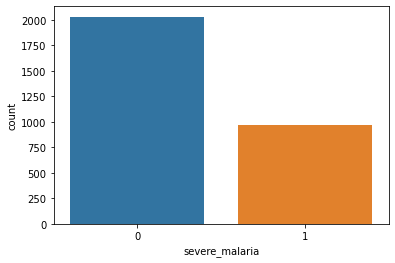

In [26]:
import seaborn as sns

sns.countplot(malaria['severe_malaria'],label="Count")

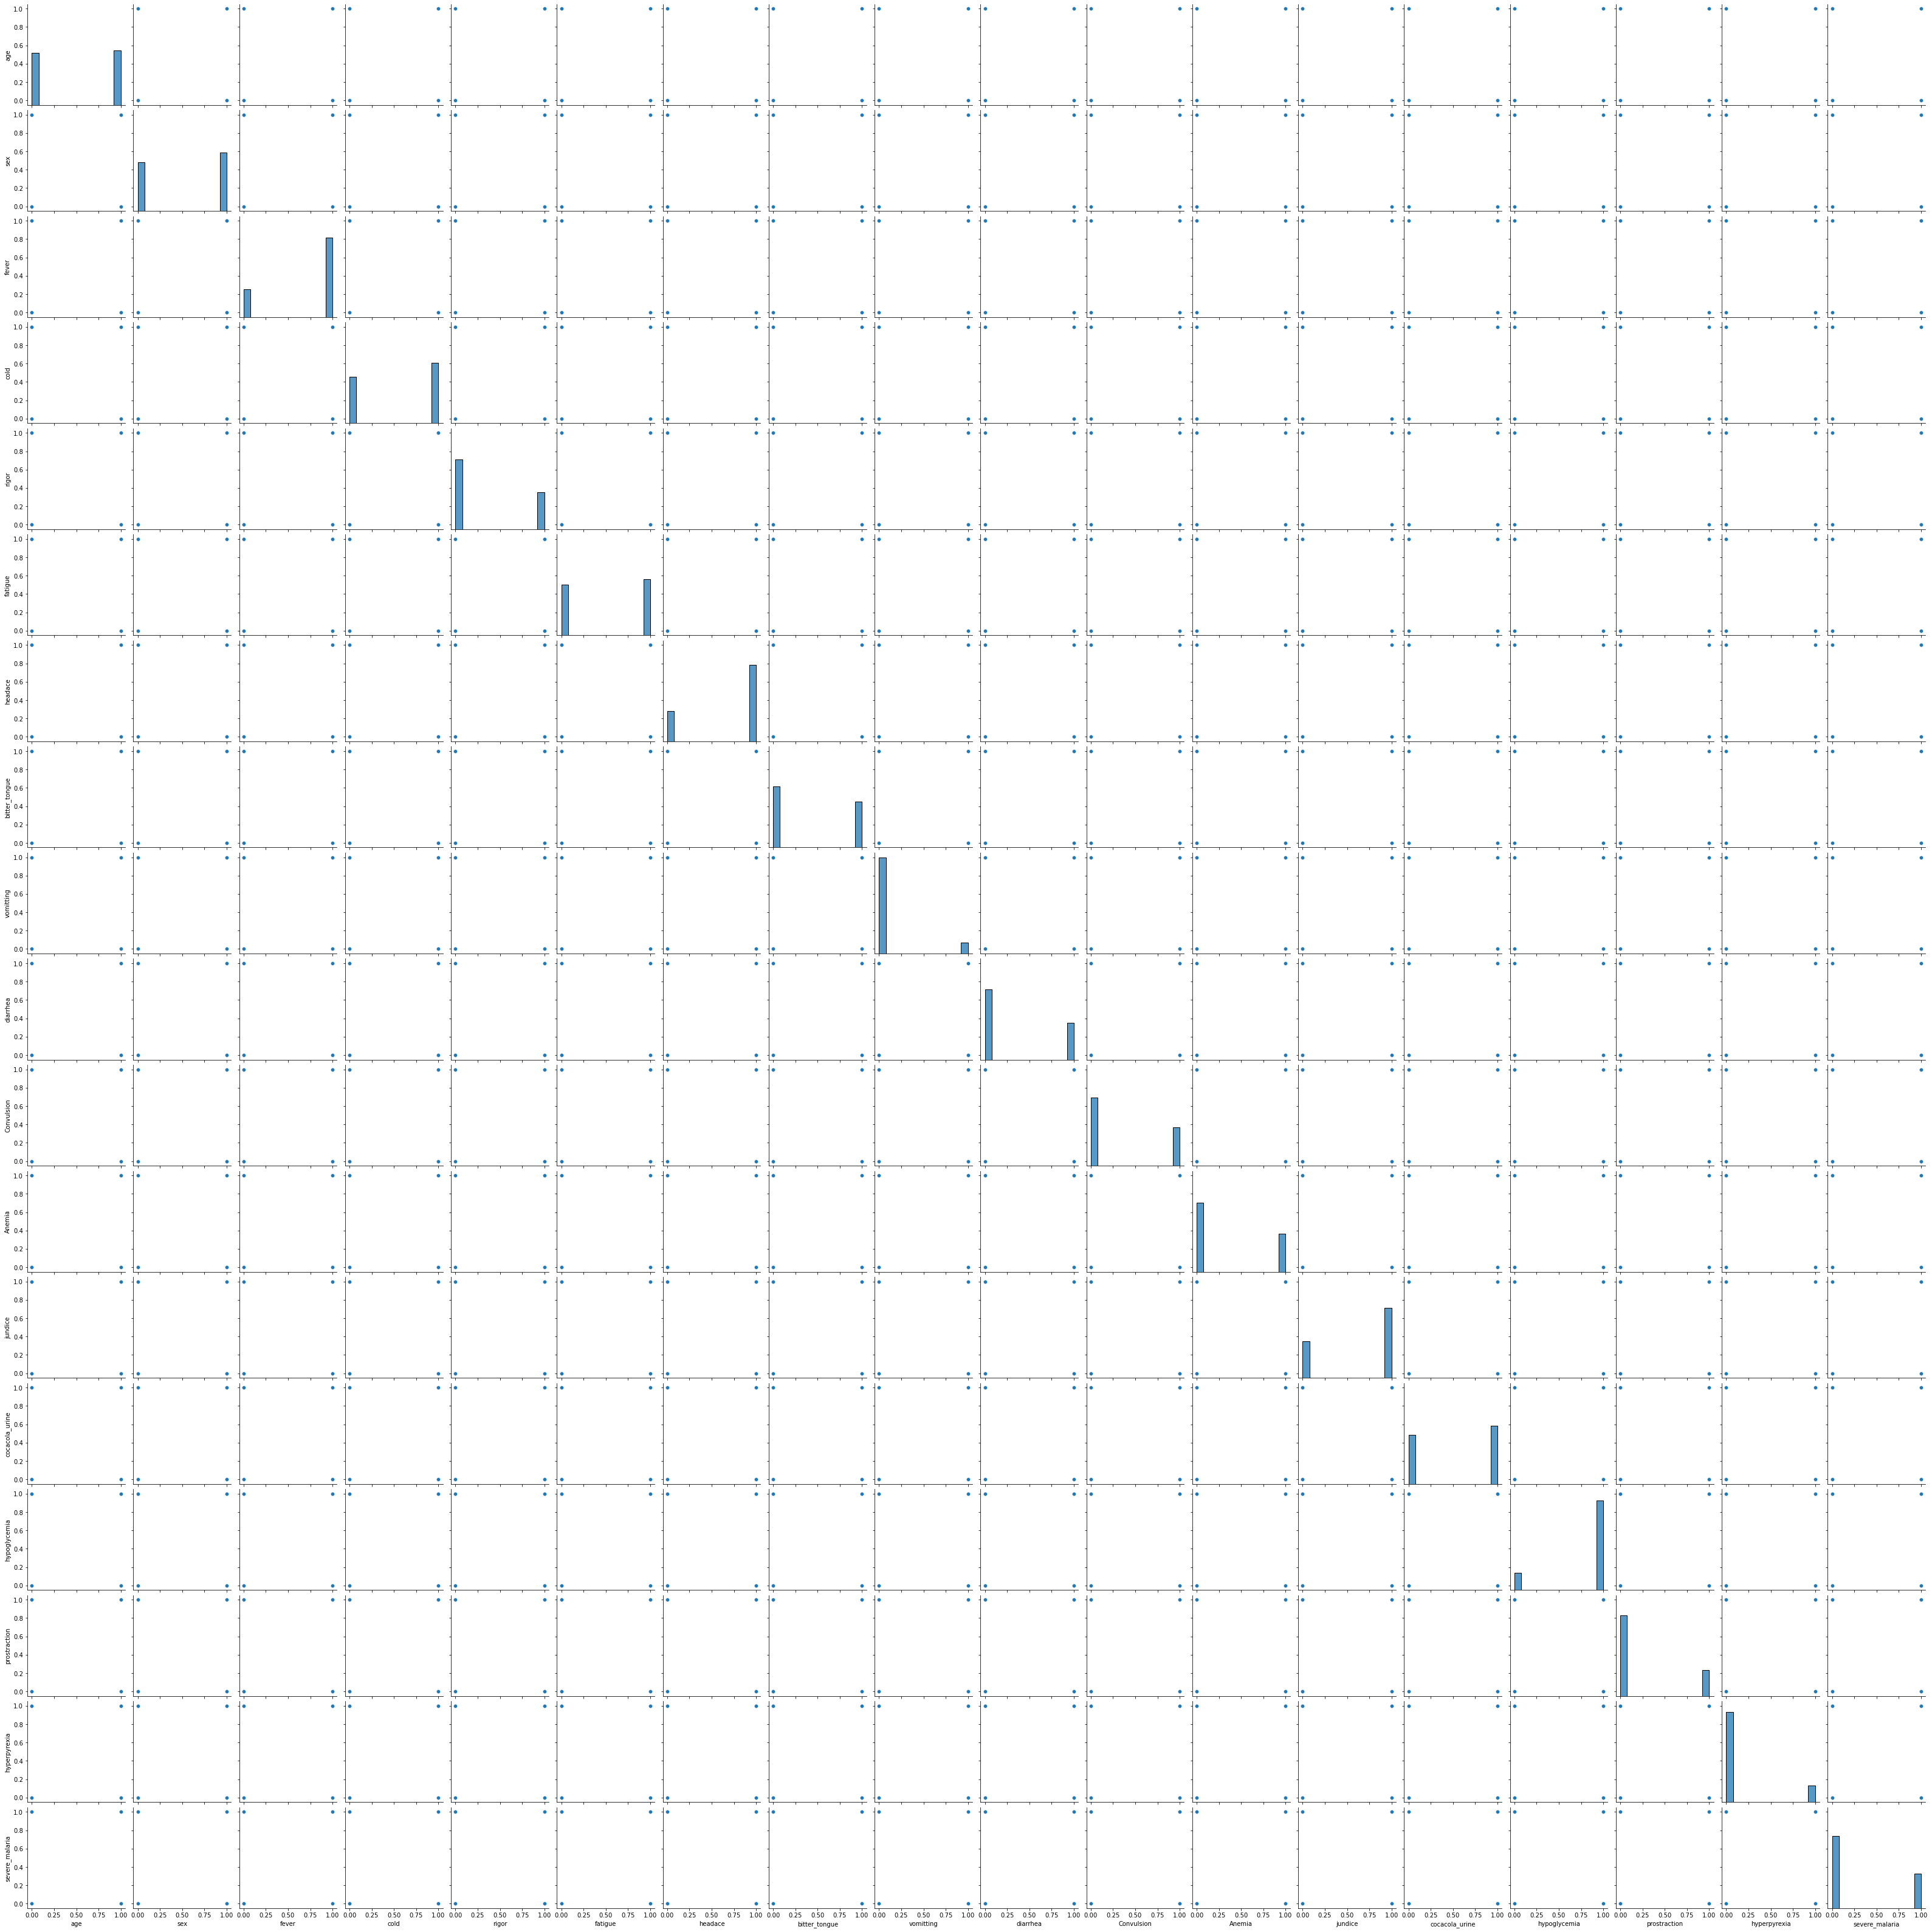

In [27]:
sns.pairplot(malaria)

<AxesSubplot:>

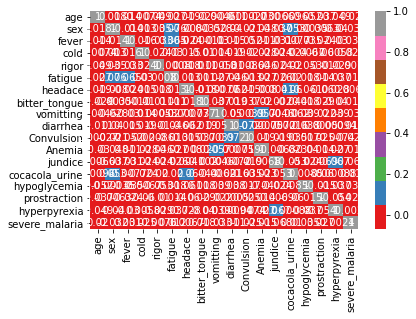

In [28]:
sns.heatmap(malaria.corr(),cmap='Set1',annot=True)

In [29]:
malaria["sex"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='severe_malaria'>

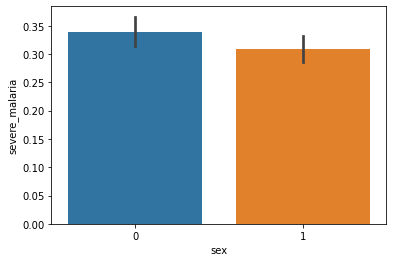

In [30]:
sns.barplot(malaria["sex"],y)

In [31]:
malaria["fever"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fever', ylabel='severe_malaria'>

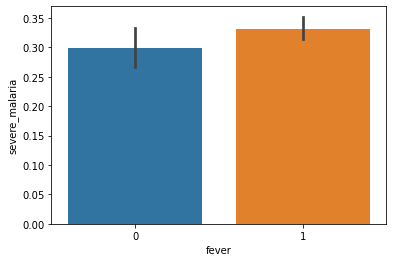

In [32]:
sns.barplot(malaria["fever"],y)

In [32]:
malaria["cold"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='cold', ylabel='severe_malaria'>

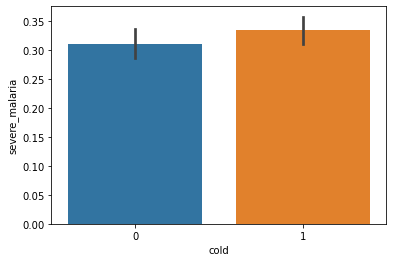

In [33]:
sns.barplot(malaria["cold"],y)

In [34]:
malaria["rigor"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='rigor', ylabel='severe_malaria'>

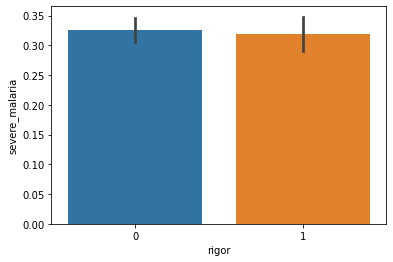

In [35]:
sns.barplot(malaria["rigor"],y)

In [36]:
malaria["fatigue"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fatigue', ylabel='severe_malaria'>

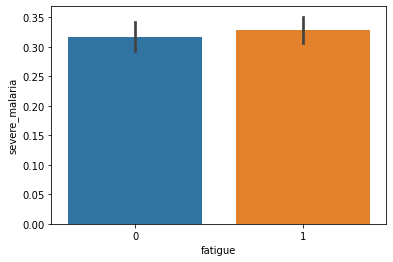

In [37]:
sns.barplot(malaria["fatigue"],y)

In [38]:
malaria["headace"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='headace', ylabel='severe_malaria'>

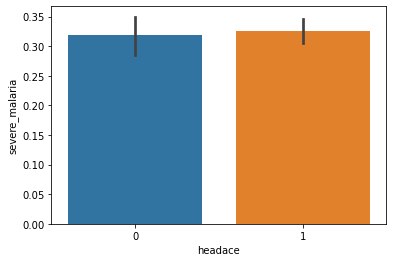

In [39]:
sns.barplot(malaria["headace"],y)

In [40]:
malaria["bitter_tongue"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='bitter_tongue', ylabel='severe_malaria'>

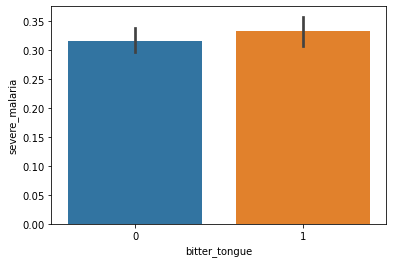

In [41]:
sns.barplot(malaria["bitter_tongue"],y)

In [42]:
malaria["vomitting"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='vomitting', ylabel='severe_malaria'>

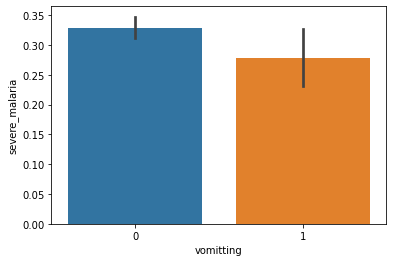

In [43]:
sns.barplot(malaria["vomitting"],y)

In [43]:
malaria["diarrhea"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='diarrhea', ylabel='severe_malaria'>

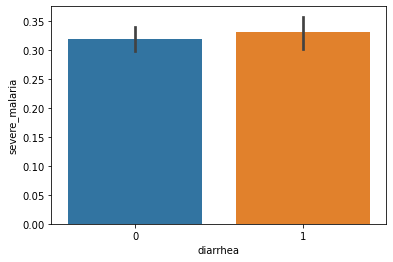

In [44]:
sns.barplot(malaria["diarrhea"],y)

In [45]:
malaria["Convulsion"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Convulsion', ylabel='severe_malaria'>

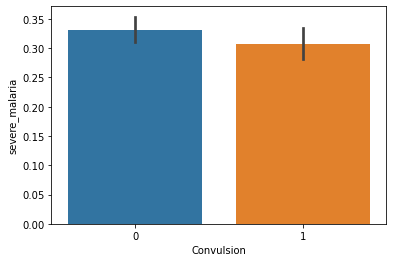

In [46]:
sns.barplot(malaria["Convulsion"],y)

In [47]:
malaria["Anemia"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Anemia', ylabel='severe_malaria'>

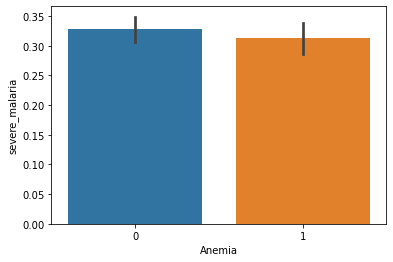

In [48]:
sns.barplot(malaria["Anemia"],y)

In [49]:
malaria["jundice"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='jundice', ylabel='severe_malaria'>

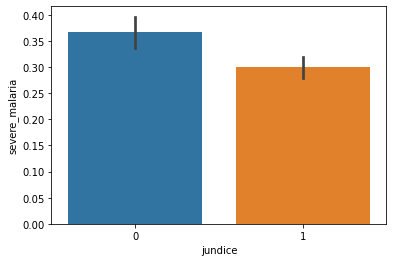

In [50]:
sns.barplot(malaria["jundice"],y)

In [51]:
malaria["cocacola_urine"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='cocacola_urine', ylabel='severe_malaria'>

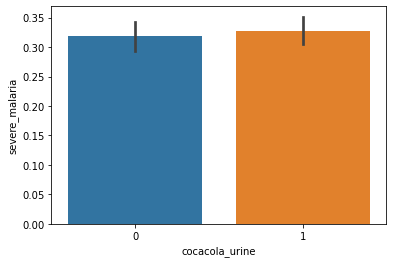

In [52]:
sns.barplot(malaria["cocacola_urine"],y)

In [53]:
malaria["hypoglycemia"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='hypoglycemia', ylabel='severe_malaria'>

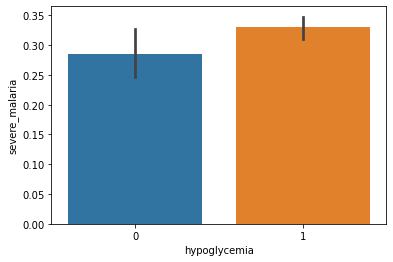

In [54]:
sns.barplot(malaria["hypoglycemia"],y)

In [55]:
malaria["prostraction"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='prostraction', ylabel='severe_malaria'>

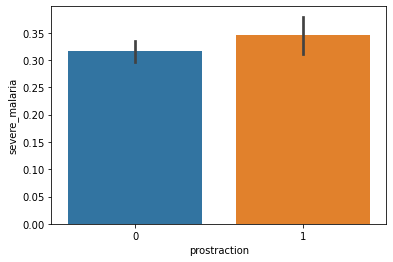

In [56]:
sns.barplot(malaria["prostraction"],y)

In [57]:
malaria["hyperpyrexia"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='hyperpyrexia', ylabel='severe_malaria'>

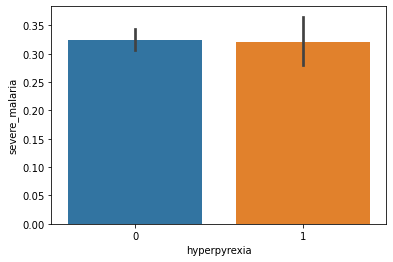

In [58]:
sns.barplot(malaria["hyperpyrexia"],y)

0    2030
1     969
Name: severe_malaria, dtype: int64


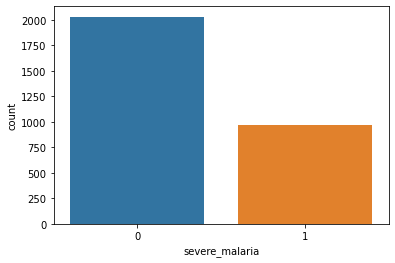

In [59]:
Y = malaria["severe_malaria"]

sns.countplot(Y)

severe_malaria_temp = malaria.severe_malaria.value_counts()
print(severe_malaria_temp)

In [60]:
print("percentage of people infected with malaria: "+str(round(severe_malaria_temp[0]*100/2999,2)))
print("percentage of people not  infected with malaria: "+str(round(severe_malaria_temp[1]*100/2999,2)))

percentage of people infected with malaria: 67.69
percentage of people not  infected with malaria: 32.31


In [61]:
#TRAINING AND TEST SPLIT DATA

In [62]:
from sklearn.model_selection import train_test_split

predictors=malaria.drop("severe_malaria",axis=1)
severe_malaria=malaria["severe_malaria"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, Y, test_size=0.25, random_state=0)

In [63]:
X_train.shape

(2249, 17)

In [64]:
X_test.shape

(750, 17)

In [65]:
Y_train.shape

(2249,)

In [66]:
Y_test.shape

(750,)

In [105]:
X_test

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
311,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0
1025,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1
1586,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,0,0
2940,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
2979,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0
2073,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1
2412,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0
2655,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0


In [67]:
#USING DIFFERENT MACHINE LEARNING ALGORITHMS

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.linear_model import LogisticRegression
#from sklearn.family import algorithms

lr=LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)



In [70]:
Y_pred_lr.shape

(750,)

In [71]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 67.87 %


In [72]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)


In [73]:
Y_pred_nb.shape

(750,)

In [74]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 68.0 %


In [75]:
from sklearn import svm

sv=svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [76]:
Y_pred_svm.shape

(750,)

In [77]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 67.87 %


In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [79]:
Y_pred_knn.shape

(750,)

In [80]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.73 %


In [81]:
from  sklearn.tree import DecisionTreeClassifier

max_accuracy = 0



for x in range(200):
    dt =  DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

#print( max_accuracy) 
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [82]:
print(Y_pred_dt.shape)

(750,)


In [83]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 94.27 %


In [84]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

#print( max_accuracy) 
#print(best_x)


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


In [85]:
Y_pred_rf.shape

(750,)

In [86]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 94.67 %


In [87]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[17:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
Y_pred_xgb.shape

(750,)

In [89]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.67 %


In [90]:
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score

In [91]:
cm_log = confusion_matrix(Y_test, Y_pred_lr)#confusion matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)#confusion matrix
cm_svm = confusion_matrix(Y_test, Y_pred_svm)#confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)#confusion matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)#confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)#confusion matrix
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)#confusion matrix



cr_log = classification_report(Y_test, Y_pred_lr)# classification report
cr_nb = classification_report(Y_test, Y_pred_nb)# classification report
cr_svm = classification_report(Y_test, Y_pred_svm)# classification report
cr_knn = classification_report(Y_test, Y_pred_knn)# classification report
cr_dt = classification_report(Y_test, Y_pred_dt)# classification report
cr_rf = classification_report(Y_test, Y_pred_rf)# classification report
cr_xgb = classification_report(Y_test, Y_pred_xgb)# classification report

In [92]:
print("logistic Regression:\n\n",cm_log)
print("KNN:\n\n",cm_knn)
print("SVM:\n\n",cm_svm)
print("DT:\n\n",cm_dt)
print("RF:\n\n",cm_rf)
print("NB:\n\n",cm_nb)
print("XGB:\n\n",cm_xgb)
print("logistic Regression:\n\n",cr_log)
print("KNN:\n\n",cr_knn)
print("SVM:\n\n",cr_svm)
print("DT:\n\n",cr_dt)
print("RF:\n\n",cr_rf)
print("NB:\n\n",cr_nb)
print("XGB:\n\n",cr_xgb)

logistic Regression:

 [[509   0]
 [241   0]]
KNN:

 [[423  86]
 [141 100]]
SVM:

 [[509   0]
 [241   0]]
DT:

 [[488  21]
 [ 22 219]]
RF:

 [[491  18]
 [ 22 219]]
NB:

 [[505   4]
 [236   5]]
XGB:

 [[485  24]
 [ 31 210]]
logistic Regression:

               precision    recall  f1-score   support

           0       0.68      1.00      0.81       509
           1       0.00      0.00      0.00       241

    accuracy                           0.68       750
   macro avg       0.34      0.50      0.40       750
weighted avg       0.46      0.68      0.55       750

KNN:

               precision    recall  f1-score   support

           0       0.75      0.83      0.79       509
           1       0.54      0.41      0.47       241

    accuracy                           0.70       750
   macro avg       0.64      0.62      0.63       750
weighted avg       0.68      0.70      0.69       750

SVM:

               precision    recall  f1-score   support

           0       0.68      1.

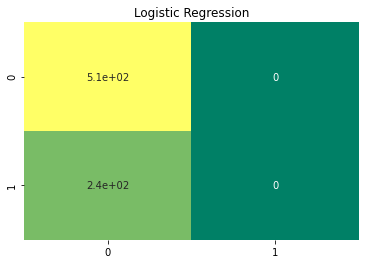

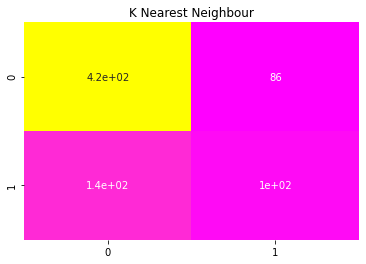

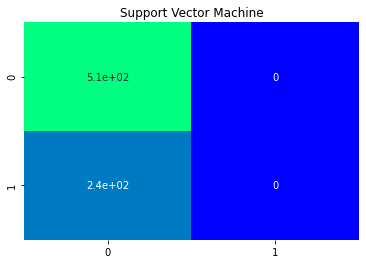

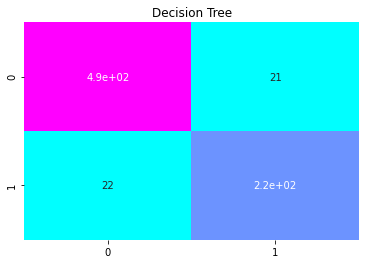

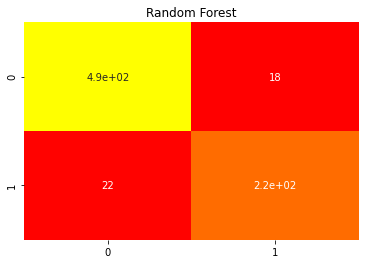

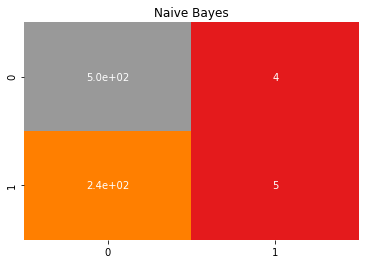

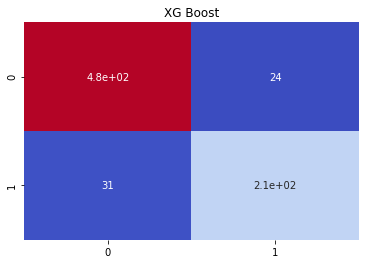

In [93]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Decision Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_nb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Naive Bayes')
plt.show()
sns.heatmap(cm_xgb,annot=True,cbar=None,cmap = 'coolwarm')
plt.title('XG Boost')
plt.show()


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [95]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=17))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
model.fit(X_train,Y_train,epochs=2000)# need to change to 2000

Epoch 1/2000
71/71 [==============================] - 2s 2ms/step - loss: 0.6685 - accuracy: 0.6278
Epoch 2/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6741
Epoch 3/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6767
Epoch 4/2000
71/71 [==============================] - 0s 991us/step - loss: 0.6319 - accuracy: 0.6776
Epoch 5/2000
71/71 [==============================] - 0s 983us/step - loss: 0.6289 - accuracy: 0.6785
Epoch 6/2000
71/71 [==============================] - 0s 969us/step - loss: 0.6260 - accuracy: 0.6781
Epoch 7/2000
71/71 [==============================] - 0s 979us/step - loss: 0.6233 - accuracy: 0.6776
Epoch 8/2000
71/71 [==============================] - 0s 997us/step - loss: 0.6212 - accuracy: 0.6776
Epoch 9/2000
71/71 [==============================] - 0s 974us/step - loss: 0.6192 - accuracy: 0.6776
Epoch 10/2000
71/71 [==============================] - 0s 995us/step - loss: 0.6172 - ac

71/71 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7292
Epoch 82/2000
71/71 [==============================] - 0s 946us/step - loss: 0.5404 - accuracy: 0.7292
Epoch 83/2000
71/71 [==============================] - 0s 940us/step - loss: 0.5401 - accuracy: 0.7310
Epoch 84/2000
71/71 [==============================] - 0s 936us/step - loss: 0.5393 - accuracy: 0.7310
Epoch 85/2000
71/71 [==============================] - 0s 908us/step - loss: 0.5385 - accuracy: 0.7305
Epoch 86/2000
71/71 [==============================] - 0s 898us/step - loss: 0.5382 - accuracy: 0.7301
Epoch 87/2000
71/71 [==============================] - 0s 955us/step - loss: 0.5379 - accuracy: 0.7328
Epoch 88/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7314
Epoch 89/2000
71/71 [==============================] - 0s 869us/step - loss: 0.5370 - accuracy: 0.7332
Epoch 90/2000
71/71 [==============================] - 0s 896us/step - loss: 0.5359 - accur

71/71 [==============================] - 0s 981us/step - loss: 0.5059 - accuracy: 0.7541
Epoch 161/2000
71/71 [==============================] - 0s 908us/step - loss: 0.5051 - accuracy: 0.7519
Epoch 162/2000
71/71 [==============================] - 0s 894us/step - loss: 0.5045 - accuracy: 0.7528
Epoch 163/2000
71/71 [==============================] - 0s 895us/step - loss: 0.5039 - accuracy: 0.7528
Epoch 164/2000
71/71 [==============================] - 0s 881us/step - loss: 0.5035 - accuracy: 0.7554
Epoch 165/2000
71/71 [==============================] - 0s 881us/step - loss: 0.5037 - accuracy: 0.7554
Epoch 166/2000
71/71 [==============================] - 0s 895us/step - loss: 0.5031 - accuracy: 0.7528
Epoch 167/2000
71/71 [==============================] - 0s 895us/step - loss: 0.5025 - accuracy: 0.7546
Epoch 168/2000
71/71 [==============================] - 0s 869us/step - loss: 0.5022 - accuracy: 0.7559
Epoch 169/2000
71/71 [==============================] - 0s 869us/step - loss: 0

71/71 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7688
Epoch 239/2000
71/71 [==============================] - 0s 953us/step - loss: 0.4841 - accuracy: 0.7723
Epoch 240/2000
71/71 [==============================] - 0s 838us/step - loss: 0.4844 - accuracy: 0.7697
Epoch 241/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4841 - accuracy: 0.7741
Epoch 242/2000
71/71 [==============================] - 0s 863us/step - loss: 0.4837 - accuracy: 0.7715
Epoch 243/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4833 - accuracy: 0.7741
Epoch 244/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4833 - accuracy: 0.7692
Epoch 245/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4833 - accuracy: 0.7750
Epoch 246/2000
71/71 [==============================] - 0s 937us/step - loss: 0.4826 - accuracy: 0.7728
Epoch 247/2000
71/71 [==============================] - 0s 938us/step - loss: 0.4

Epoch 317/2000
71/71 [==============================] - 0s 912us/step - loss: 0.4674 - accuracy: 0.7741
Epoch 318/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4676 - accuracy: 0.7732
Epoch 319/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4668 - accuracy: 0.7737
Epoch 320/2000
71/71 [==============================] - 0s 953us/step - loss: 0.4665 - accuracy: 0.7777
Epoch 321/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4662 - accuracy: 0.7732
Epoch 322/2000
71/71 [==============================] - 0s 909us/step - loss: 0.4662 - accuracy: 0.7723
Epoch 323/2000
71/71 [==============================] - 0s 910us/step - loss: 0.4661 - accuracy: 0.7737
Epoch 324/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4655 - accuracy: 0.7737
Epoch 325/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4657 - accuracy: 0.7715
Epoch 326/2000
71/71 [==============================] - 0s 881us

71/71 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7755
Epoch 397/2000
71/71 [==============================] - 0s 978us/step - loss: 0.4541 - accuracy: 0.7759
Epoch 398/2000
71/71 [==============================] - 0s 979us/step - loss: 0.4544 - accuracy: 0.7750
Epoch 399/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7741
Epoch 400/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7777
Epoch 401/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7768
Epoch 402/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7746
Epoch 403/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.7790
Epoch 404/2000
71/71 [==============================] - 0s 988us/step - loss: 0.4537 - accuracy: 0.7768
Epoch 405/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4534 - accura

71/71 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7817
Epoch 477/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7848
Epoch 478/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7839
Epoch 479/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7861
Epoch 480/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7848
Epoch 481/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7852
Epoch 482/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7826
Epoch 483/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7852
Epoch 484/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.7857
Epoch 485/2000
71/71 [==============================] - 0s 926us/step - loss: 0.4459 - accuracy: 

71/71 [==============================] - 0s 893us/step - loss: 0.4406 - accuracy: 0.7910
Epoch 556/2000
71/71 [==============================] - 0s 910us/step - loss: 0.4396 - accuracy: 0.7915
Epoch 557/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4402 - accuracy: 0.7919
Epoch 558/2000
71/71 [==============================] - 0s 877us/step - loss: 0.4395 - accuracy: 0.7937
Epoch 559/2000
71/71 [==============================] - 0s 866us/step - loss: 0.4400 - accuracy: 0.7915
Epoch 560/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4395 - accuracy: 0.7941
Epoch 561/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4401 - accuracy: 0.7906
Epoch 562/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4398 - accuracy: 0.7932
Epoch 563/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4396 - accuracy: 0.7924
Epoch 564/2000
71/71 [==============================] - 0s 912us/step - loss: 0

71/71 [==============================] - 0s 895us/step - loss: 0.4353 - accuracy: 0.7959
Epoch 634/2000
71/71 [==============================] - 0s 882us/step - loss: 0.4352 - accuracy: 0.7968
Epoch 635/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4355 - accuracy: 0.7968
Epoch 636/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4354 - accuracy: 0.7959
Epoch 637/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4355 - accuracy: 0.7981
Epoch 638/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4352 - accuracy: 0.7981
Epoch 639/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4362 - accuracy: 0.7981
Epoch 640/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4353 - accuracy: 0.7981
Epoch 641/2000
71/71 [==============================] - 0s 879us/step - loss: 0.4361 - accuracy: 0.7955
Epoch 642/2000
71/71 [==============================] - 0s 839us/step - loss: 0

71/71 [==============================] - 0s 883us/step - loss: 0.4330 - accuracy: 0.7964
Epoch 712/2000
71/71 [==============================] - 0s 955us/step - loss: 0.4328 - accuracy: 0.7968
Epoch 713/2000
71/71 [==============================] - 0s 876us/step - loss: 0.4338 - accuracy: 0.7972
Epoch 714/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4327 - accuracy: 0.7981
Epoch 715/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4338 - accuracy: 0.7981
Epoch 716/2000
71/71 [==============================] - 0s 875us/step - loss: 0.4328 - accuracy: 0.7986
Epoch 717/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4331 - accuracy: 0.7972
Epoch 718/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4321 - accuracy: 0.8008
Epoch 719/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4326 - accuracy: 0.7972
Epoch 720/2000
71/71 [==============================] - 0s 883us/step - loss: 0

71/71 [==============================] - 0s 895us/step - loss: 0.4310 - accuracy: 0.7990
Epoch 790/2000
71/71 [==============================] - 0s 919us/step - loss: 0.4310 - accuracy: 0.7964
Epoch 791/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4316 - accuracy: 0.7995
Epoch 792/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7928
Epoch 793/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8021
Epoch 794/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7977
Epoch 795/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7981
Epoch 796/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.7937
Epoch 797/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7946
Epoch 798/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4312 - accura

71/71 [==============================] - 0s 938us/step - loss: 0.4297 - accuracy: 0.8008
Epoch 869/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4294 - accuracy: 0.7955
Epoch 870/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4302 - accuracy: 0.7937
Epoch 871/2000
71/71 [==============================] - 0s 848us/step - loss: 0.4298 - accuracy: 0.7999
Epoch 872/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4293 - accuracy: 0.7981
Epoch 873/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4302 - accuracy: 0.7964
Epoch 874/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4296 - accuracy: 0.7972
Epoch 875/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4301 - accuracy: 0.7968
Epoch 876/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4292 - accuracy: 0.7959
Epoch 877/2000
71/71 [==============================] - 0s 907us/step - loss: 0

Epoch 947/2000
71/71 [==============================] - 0s 909us/step - loss: 0.4285 - accuracy: 0.7946
Epoch 948/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4279 - accuracy: 0.7977
Epoch 949/2000
71/71 [==============================] - 0s 909us/step - loss: 0.4273 - accuracy: 0.7928
Epoch 950/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4275 - accuracy: 0.7932
Epoch 951/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4275 - accuracy: 0.7972
Epoch 952/2000
71/71 [==============================] - 0s 924us/step - loss: 0.4270 - accuracy: 0.7946
Epoch 953/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4281 - accuracy: 0.7964
Epoch 954/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4277 - accuracy: 0.7937
Epoch 955/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4278 - accuracy: 0.7919
Epoch 956/2000
71/71 [==============================] - 0s 883us

71/71 [==============================] - 0s 951us/step - loss: 0.4251 - accuracy: 0.7924
Epoch 1026/2000
71/71 [==============================] - 0s 983us/step - loss: 0.4251 - accuracy: 0.7959
Epoch 1027/2000
71/71 [==============================] - 0s 960us/step - loss: 0.4281 - accuracy: 0.7950
Epoch 1028/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4257 - accuracy: 0.7946
Epoch 1029/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4256 - accuracy: 0.7924
Epoch 1030/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4254 - accuracy: 0.7959
Epoch 1031/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4260 - accuracy: 0.7937
Epoch 1032/2000
71/71 [==============================] - 0s 912us/step - loss: 0.4262 - accuracy: 0.7955
Epoch 1033/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4257 - accuracy: 0.7915
Epoch 1034/2000
71/71 [==============================] - 0s 876us/step 

Epoch 1104/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8008
Epoch 1105/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.7981
Epoch 1106/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7990
Epoch 1107/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.7990
Epoch 1108/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8008
Epoch 1109/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.7995
Epoch 1110/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.7972
Epoch 1111/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8035
Epoch 1112/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.7977
Epoch 1113/2000
71/71 [==============================] - 0s 997us/step - 

71/71 [==============================] - 0s 940us/step - loss: 0.4193 - accuracy: 0.8030
Epoch 1183/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8035
Epoch 1184/2000
71/71 [==============================] - 0s 957us/step - loss: 0.4199 - accuracy: 0.8035
Epoch 1185/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4191 - accuracy: 0.8030
Epoch 1186/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4195 - accuracy: 0.8061
Epoch 1187/2000
71/71 [==============================] - 0s 868us/step - loss: 0.4197 - accuracy: 0.8021
Epoch 1188/2000
71/71 [==============================] - 0s 910us/step - loss: 0.4199 - accuracy: 0.7999
Epoch 1189/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4196 - accuracy: 0.8030
Epoch 1190/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4191 - accuracy: 0.8039
Epoch 1191/2000
71/71 [==============================] - 0s 883us/step - 

71/71 [==============================] - 0s 896us/step - loss: 0.4183 - accuracy: 0.7990
Epoch 1261/2000
71/71 [==============================] - 0s 939us/step - loss: 0.4179 - accuracy: 0.8004
Epoch 1262/2000
71/71 [==============================] - 0s 865us/step - loss: 0.4187 - accuracy: 0.7999
Epoch 1263/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4177 - accuracy: 0.8035
Epoch 1264/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4178 - accuracy: 0.8035
Epoch 1265/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4180 - accuracy: 0.8021
Epoch 1266/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4180 - accuracy: 0.7986
Epoch 1267/2000
71/71 [==============================] - 0s 912us/step - loss: 0.4186 - accuracy: 0.8035
Epoch 1268/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4175 - accuracy: 0.8008
Epoch 1269/2000
71/71 [==============================] - 0s 872us/step 

71/71 [==============================] - 0s 919us/step - loss: 0.4158 - accuracy: 0.8035
Epoch 1338/2000
71/71 [==============================] - 0s 882us/step - loss: 0.4159 - accuracy: 0.8066
Epoch 1339/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4157 - accuracy: 0.8044
Epoch 1340/2000
71/71 [==============================] - 0s 863us/step - loss: 0.4162 - accuracy: 0.8066
Epoch 1341/2000
71/71 [==============================] - 0s 853us/step - loss: 0.4158 - accuracy: 0.8035
Epoch 1342/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4167 - accuracy: 0.8039
Epoch 1343/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4162 - accuracy: 0.8057
Epoch 1344/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4153 - accuracy: 0.8052
Epoch 1345/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4159 - accuracy: 0.8048
Epoch 1346/2000
71/71 [==============================] - 0s 883us/step 

71/71 [==============================] - 0s 909us/step - loss: 0.4150 - accuracy: 0.8044
Epoch 1415/2000
71/71 [==============================] - 0s 926us/step - loss: 0.4154 - accuracy: 0.7999
Epoch 1416/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4151 - accuracy: 0.8017
Epoch 1417/2000
71/71 [==============================] - 0s 862us/step - loss: 0.4156 - accuracy: 0.8044
Epoch 1418/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4147 - accuracy: 0.8035
Epoch 1419/2000
71/71 [==============================] - 0s 907us/step - loss: 0.4150 - accuracy: 0.8048
Epoch 1420/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4158 - accuracy: 0.8030
Epoch 1421/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4149 - accuracy: 0.8044
Epoch 1422/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4142 - accuracy: 0.8039
Epoch 1423/2000
71/71 [==============================] - 0s 883us/step 

71/71 [==============================] - 0s 898us/step - loss: 0.4121 - accuracy: 0.8070
Epoch 1493/2000
71/71 [==============================] - 0s 974us/step - loss: 0.4120 - accuracy: 0.8079
Epoch 1494/2000
71/71 [==============================] - 0s 917us/step - loss: 0.4121 - accuracy: 0.8115
Epoch 1495/2000
71/71 [==============================] - 0s 851us/step - loss: 0.4129 - accuracy: 0.8061
Epoch 1496/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4120 - accuracy: 0.8075
Epoch 1497/2000
71/71 [==============================] - 0s 864us/step - loss: 0.4118 - accuracy: 0.8092
Epoch 1498/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4126 - accuracy: 0.8106
Epoch 1499/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4119 - accuracy: 0.8101
Epoch 1500/2000
71/71 [==============================] - 0s 935us/step - loss: 0.4122 - accuracy: 0.8092
Epoch 1501/2000
71/71 [==============================] - 0s 898us/step 

71/71 [==============================] - 0s 924us/step - loss: 0.4106 - accuracy: 0.8173
Epoch 1571/2000
71/71 [==============================] - 0s 882us/step - loss: 0.4105 - accuracy: 0.8137
Epoch 1572/2000
71/71 [==============================] - 0s 950us/step - loss: 0.4104 - accuracy: 0.8106
Epoch 1573/2000
71/71 [==============================] - 0s 912us/step - loss: 0.4104 - accuracy: 0.8101
Epoch 1574/2000
71/71 [==============================] - 0s 892us/step - loss: 0.4104 - accuracy: 0.8133
Epoch 1575/2000
71/71 [==============================] - 0s 867us/step - loss: 0.4108 - accuracy: 0.8141
Epoch 1576/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4099 - accuracy: 0.8124
Epoch 1577/2000
71/71 [==============================] - 0s 865us/step - loss: 0.4107 - accuracy: 0.8124
Epoch 1578/2000
71/71 [==============================] - 0s 852us/step - loss: 0.4105 - accuracy: 0.8115
Epoch 1579/2000
71/71 [==============================] - 0s 881us/step 

71/71 [==============================] - 0s 883us/step - loss: 0.4103 - accuracy: 0.8128
Epoch 1649/2000
71/71 [==============================] - 0s 983us/step - loss: 0.4097 - accuracy: 0.8173
Epoch 1650/2000
71/71 [==============================] - 0s 865us/step - loss: 0.4091 - accuracy: 0.8141
Epoch 1651/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4105 - accuracy: 0.8173
Epoch 1652/2000
71/71 [==============================] - 0s 875us/step - loss: 0.4096 - accuracy: 0.8110
Epoch 1653/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4100 - accuracy: 0.8133
Epoch 1654/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4103 - accuracy: 0.8101
Epoch 1655/2000
71/71 [==============================] - 0s 898us/step - loss: 0.4094 - accuracy: 0.8101
Epoch 1656/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4096 - accuracy: 0.8141
Epoch 1657/2000
71/71 [==============================] - 0s 898us/step 

71/71 [==============================] - 0s 924us/step - loss: 0.4097 - accuracy: 0.8128
Epoch 1727/2000
71/71 [==============================] - 0s 897us/step - loss: 0.4095 - accuracy: 0.8168
Epoch 1728/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4089 - accuracy: 0.8137
Epoch 1729/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4086 - accuracy: 0.8115
Epoch 1730/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4093 - accuracy: 0.8150
Epoch 1731/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4090 - accuracy: 0.8137
Epoch 1732/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4094 - accuracy: 0.8146
Epoch 1733/2000
71/71 [==============================] - 0s 841us/step - loss: 0.4094 - accuracy: 0.8097
Epoch 1734/2000
71/71 [==============================] - 0s 864us/step - loss: 0.4086 - accuracy: 0.8137
Epoch 1735/2000
71/71 [==============================] - 0s 852us/step 

71/71 [==============================] - 0s 924us/step - loss: 0.4088 - accuracy: 0.8133
Epoch 1804/2000
71/71 [==============================] - 0s 896us/step - loss: 0.4091 - accuracy: 0.8146
Epoch 1805/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4093 - accuracy: 0.8115
Epoch 1806/2000
71/71 [==============================] - 0s 849us/step - loss: 0.4101 - accuracy: 0.8155
Epoch 1807/2000
71/71 [==============================] - 0s 881us/step - loss: 0.4094 - accuracy: 0.8119
Epoch 1808/2000
71/71 [==============================] - 0s 895us/step - loss: 0.4082 - accuracy: 0.8124
Epoch 1809/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4089 - accuracy: 0.8159
Epoch 1810/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4086 - accuracy: 0.8146
Epoch 1811/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4088 - accuracy: 0.8128
Epoch 1812/2000
71/71 [==============================] - 0s 898us/step 

71/71 [==============================] - 0s 928us/step - loss: 0.4088 - accuracy: 0.8101
Epoch 1882/2000
71/71 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8155
Epoch 1883/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4085 - accuracy: 0.8137
Epoch 1884/2000
71/71 [==============================] - 0s 877us/step - loss: 0.4078 - accuracy: 0.8137
Epoch 1885/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4096 - accuracy: 0.8119
Epoch 1886/2000
71/71 [==============================] - 0s 850us/step - loss: 0.4084 - accuracy: 0.8084
Epoch 1887/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4093 - accuracy: 0.8124
Epoch 1888/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4093 - accuracy: 0.8155
Epoch 1889/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4082 - accuracy: 0.8128
Epoch 1890/2000
71/71 [==============================] - 0s 898us/step - 

71/71 [==============================] - 0s 898us/step - loss: 0.4076 - accuracy: 0.8092
Epoch 1960/2000
71/71 [==============================] - 0s 909us/step - loss: 0.4092 - accuracy: 0.8155
Epoch 1961/2000
71/71 [==============================] - 0s 855us/step - loss: 0.4081 - accuracy: 0.8155
Epoch 1962/2000
71/71 [==============================] - 0s 848us/step - loss: 0.4086 - accuracy: 0.8133
Epoch 1963/2000
71/71 [==============================] - 0s 838us/step - loss: 0.4081 - accuracy: 0.8124
Epoch 1964/2000
71/71 [==============================] - 0s 869us/step - loss: 0.4084 - accuracy: 0.8106
Epoch 1965/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4080 - accuracy: 0.8150
Epoch 1966/2000
71/71 [==============================] - 0s 883us/step - loss: 0.4083 - accuracy: 0.8115
Epoch 1967/2000
71/71 [==============================] - 0s 926us/step - loss: 0.4082 - accuracy: 0.8115
Epoch 1968/2000
71/71 [==============================] - 0s 898us/step 

In [97]:
Y_pred_nn = model.predict(X_test)

In [98]:
Y_pred_nn.shape

(750, 1)

In [99]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [100]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 74.53 %


In [101]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Networks"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using  "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using  Logistic Regression is: 67.87 %
The accuracy score achieved using  Naive Bayes is: 68.0 %
The accuracy score achieved using  Support Vector Machine is: 67.87 %
The accuracy score achieved using  K-Nearest Neighbors is: 69.73 %
The accuracy score achieved using  Decision Tree is: 94.27 %
The accuracy score achieved using  Random Forest is: 94.67 %
The accuracy score achieved using  XGBoost is: 92.67 %
The accuracy score achieved using  Neural Networks is: 74.53 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

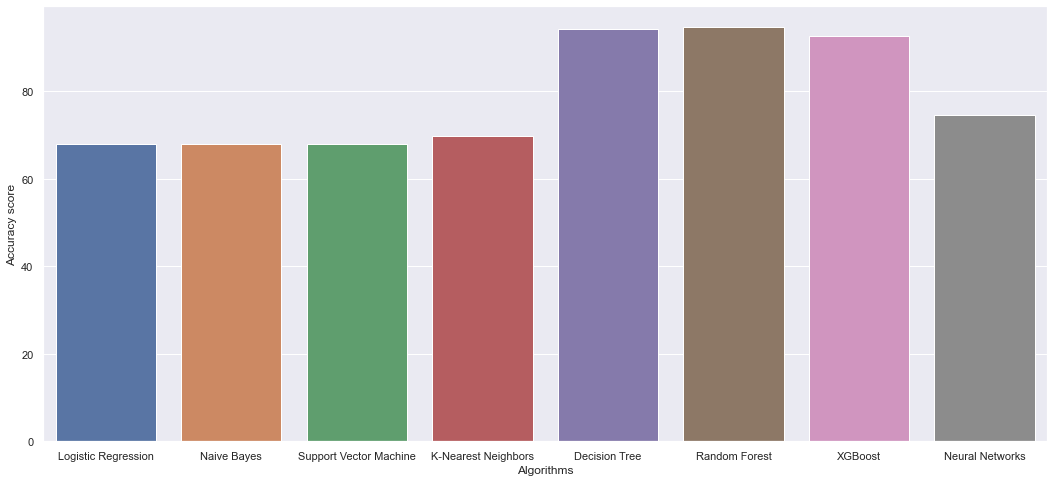

In [102]:
sns.set(rc={'figure.figsize':(18,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")


sns.barplot(algorithms,scores)

In [103]:
print(type(X_train))
len(X_train)

<class 'pandas.core.frame.DataFrame'>


2249

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

symptoms=['age','sex','fever', 'cold', 'rigor', 'faigue', 'headace', 'bitter_tongue', 'vomitting', 'diarrhea', 'convulsion', 'anemia', 'jundice', 'cocacola_urine', 'hupoglycemia', 'prostraction', 'hyperpyrexia']
print("Enter '1' if you have folllowing symptoms '0' otherwise ")
test=[]
for sym in symptoms:
    print("Do you have ",sym,":")
    test.append(int(input()))
print(test)
new_test=[test]
#new_test=[[1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1]]
ans=rf.predict(new_test)
if ans[0]:
    print("You tested severe malaria POSITIVE")
else:
    print("you tested severe malaria NEGATIVE")
#print("YOU TEST RESULT IS ",ans)

Accuracy on training set: 0.982
Accuracy on test set: 0.939
Enter '1' if you have folllowing symptoms '0' otherwise 
Do you have  age :
0
Do you have  sex :
1
Do you have  fever :
0
Do you have  cold :
0
Do you have  rigor :
0
Do you have  faigue :
0
Do you have  headace :
0
Do you have  bitter_tongue :
0
Do you have  vomitting :
0
Do you have  diarrhea :
0
Do you have  convulsion :
0
Do you have  anemia :
0
Do you have  jundice :
0
Do you have  cocacola_urine :
0
Do you have  hupoglycemia :
0
Do you have  prostraction :
0
Do you have  hyperpyrexia :
0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
You tested severe malaria POSITIVE


# rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
#rf1.fit(X_train, y_train) print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train))) print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

